In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from data_generation.problem_generator import ProblemData, generate_random_data, generate_simple_data
from visualizations.solution_visualizations import prepare_data_for_gantt_chart, plot_gantt_chart, plot_robot_trajectories
from visualizations.problem_instance_visualizations import show_problem_instance, plot_task_map 
from aswale_23.greedy_solver import greedy_scheduling
from aswale_23.MILP_solver import milp_scheduling

ModuleNotFoundError: No module named 'aswale_23.visualizations'

In [63]:
n_tasks = 6
n_robots = 5
n_skills = 3
np.random.seed(35)

precedence_constraints = np.array([[1,2]])

robots = range(n_robots)
skills = range(n_skills)


tasks = range(n_tasks + 2) # Add start and end task

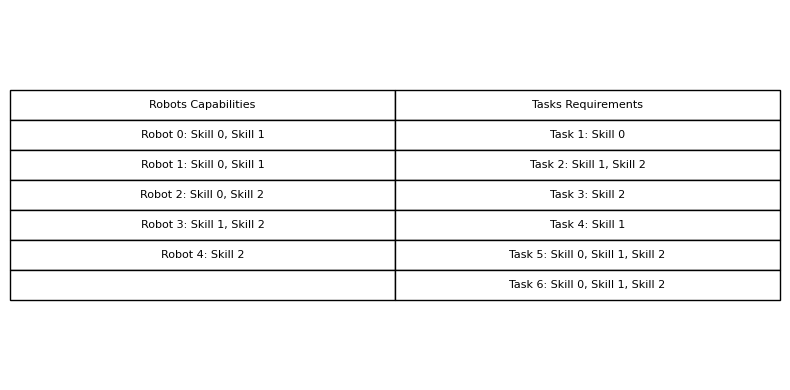

In [64]:
%autoreload 2
problem_instance: ProblemData = generate_random_data(n_tasks, n_robots, n_skills, precedence_constraints)
show_problem_instance(problem_instance)



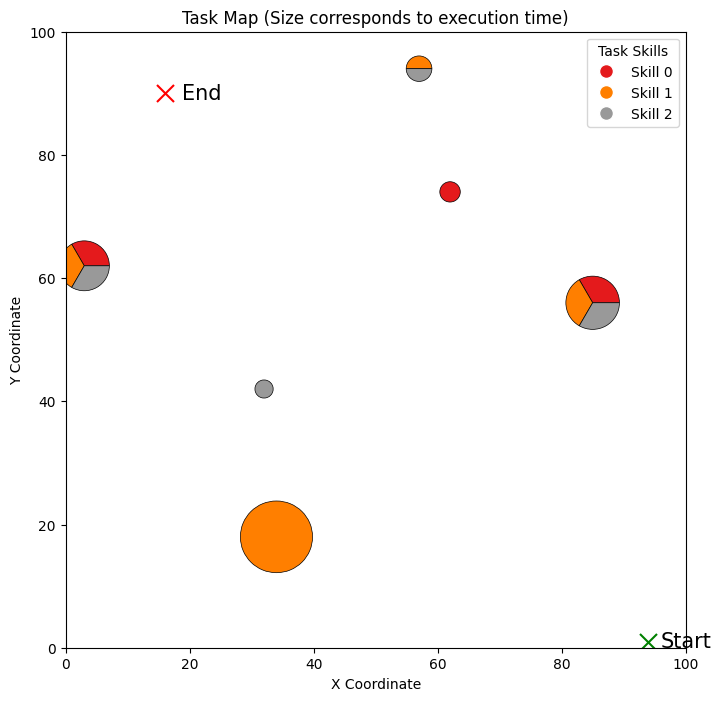

In [65]:
%autoreload 2
plot_task_map(problem_instance['task_locations'], problem_instance['T_e'], problem_instance['R'])


### Greedy algorithm



Greedy time to completion: 566.5933276543033


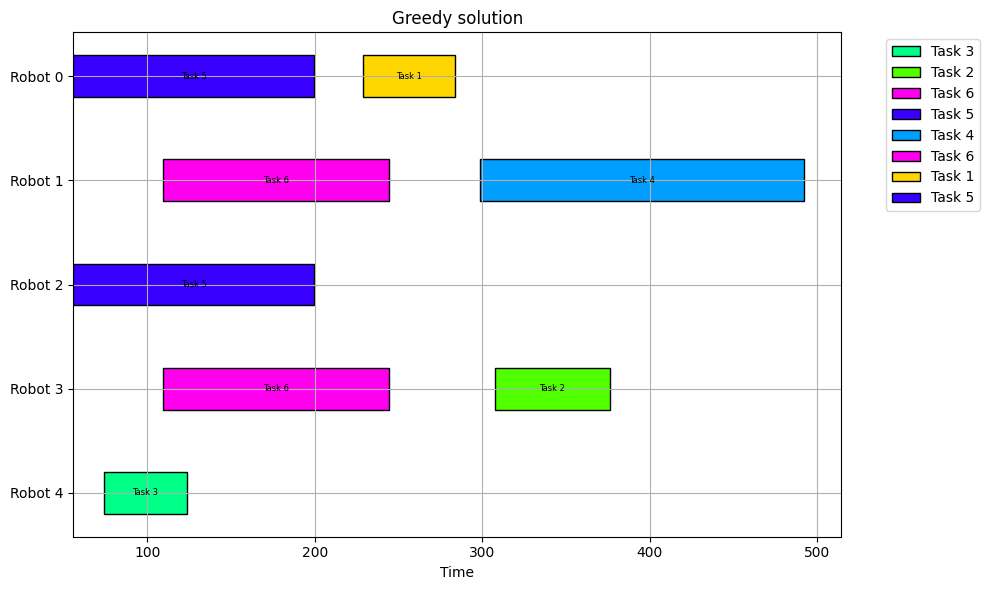

In [66]:
makespan, robot_task_assignments, task_start_times = greedy_scheduling(problem_instance)

tasks_to_plot_greedy, task_colors = prepare_data_for_gantt_chart(robots, tasks, robot_task_assignments, task_start_times, problem_instance['T_e'])
plot_gantt_chart("Greedy solution", robots, tasks_to_plot_greedy, task_colors)


In [278]:
robot_task_assignments

array([[[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

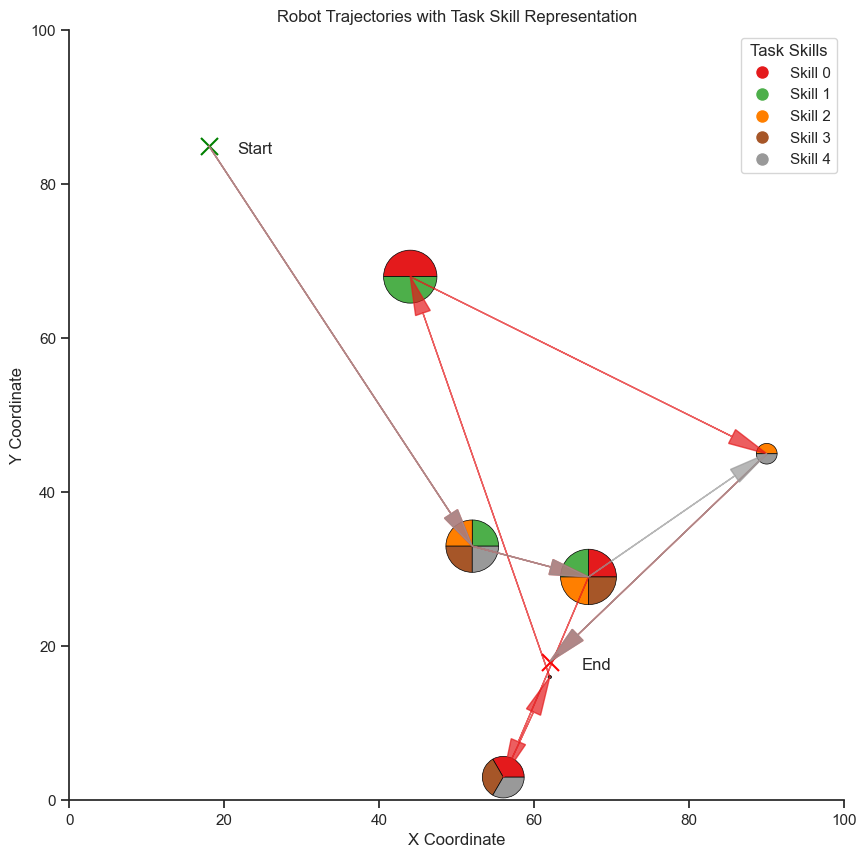

In [273]:
%autoreload
plot_robot_trajectories(problem_instance['task_locations'], tasks_to_plot_greedy, problem_instance['T_e'], problem_instance['R'])

### MILP Solver

In [ ]:
makespan, tasks_to_plot_milp, task_colors = milp_scheduling(problem_instance)
plot_gantt_chart("MILP solution", robots, tasks_to_plot_milp, task_colors)

In [ ]:
plot_robot_trajectories(problem_instance['task_locations'], tasks_to_plot_milp, problem_instance['T_e'], problem_instance['R'])

  0%|          | 0/20 [00:00<?, ?it/s]

Greedy time to completion: 1122.501246879083


  5%|▌         | 1/20 [01:29<28:16, 89.29s/it]

Status: Optimal
MILP time to complete all tasks: 1010.6735
Greedy time to completion: 910.6715685947191


 10%|█         | 2/20 [03:12<29:11, 97.31s/it]

Status: Optimal
MILP time to complete all tasks: 790.33707
Greedy time to completion: 961.4478761244429


 15%|█▌        | 3/20 [13:11<1:32:29, 326.45s/it]

Status: Optimal
MILP time to complete all tasks: 832.52769
Greedy time to completion: 1300.546631387807


 20%|██        | 4/20 [17:05<1:17:18, 289.93s/it]

Status: Optimal
MILP time to complete all tasks: 1270.6441
Greedy time to completion: 965.0250536645176


 25%|██▌       | 5/20 [19:19<58:27, 233.82s/it]  

Status: Optimal
MILP time to complete all tasks: 758.32746
Greedy time to completion: 1304.5819636548958


 30%|███       | 6/20 [24:02<58:26, 250.45s/it]

Status: Optimal
MILP time to complete all tasks: 1257.5208
Greedy time to completion: 1633.1836584626337


 35%|███▌      | 7/20 [25:26<42:29, 196.09s/it]

Status: Optimal
MILP time to complete all tasks: 1482.0706
Greedy time to completion: 562.5100964943641


 40%|████      | 8/20 [35:27<1:05:01, 325.13s/it]

Status: Optimal
MILP time to complete all tasks: 550.3092
Greedy time to completion: 608.0723843881086


 45%|████▌     | 9/20 [45:29<1:15:28, 411.69s/it]

Status: Optimal
MILP time to complete all tasks: 615.6634
Greedy time to completion: 1164.192114439469


 50%|█████     | 10/20 [51:22<1:05:33, 393.36s/it]

Status: Optimal
MILP time to complete all tasks: 793.77369
Greedy time to completion: 970.8065545014238


 55%|█████▌    | 11/20 [53:54<47:55, 319.49s/it]  

Status: Optimal
MILP time to complete all tasks: 899.37251
Greedy time to completion: 877.9354844531074


 60%|██████    | 12/20 [57:59<39:35, 296.98s/it]

Status: Optimal
MILP time to complete all tasks: 867.71303
Greedy time to completion: 1215.555226176248


 65%|██████▌   | 13/20 [58:18<24:48, 212.59s/it]

Status: Optimal
MILP time to complete all tasks: 1149.9576
Greedy time to completion: 1148.1732922314611


 70%|███████   | 14/20 [58:31<15:14, 152.41s/it]

Status: Optimal
MILP time to complete all tasks: 1021.2945
Greedy time to completion: 1127.5559570937335


 75%|███████▌  | 15/20 [1:07:13<21:59, 263.83s/it]

Status: Optimal
MILP time to complete all tasks: 1075.7748
Greedy time to completion: 1149.2527554207452


 80%|████████  | 16/20 [1:07:19<12:24, 186.18s/it]

Status: Optimal
MILP time to complete all tasks: 1093.9798
Greedy time to completion: 1259.7925261854177


 85%|████████▌ | 17/20 [1:17:19<15:32, 310.71s/it]

Status: Optimal
MILP time to complete all tasks: 1056.6012
Greedy time to completion: 915.651720006728


 90%|█████████ | 18/20 [1:21:48<09:56, 298.15s/it]

Status: Optimal
MILP time to complete all tasks: 749.82465
Greedy time to completion: 963.8213013857447


 95%|█████████▌| 19/20 [1:31:50<06:29, 389.24s/it]

Status: Optimal
MILP time to complete all tasks: 904.41137
Greedy time to completion: 864.3159122534242


100%|██████████| 20/20 [1:31:52<00:00, 275.62s/it]

Status: Optimal
MILP time to complete all tasks: 811.21669


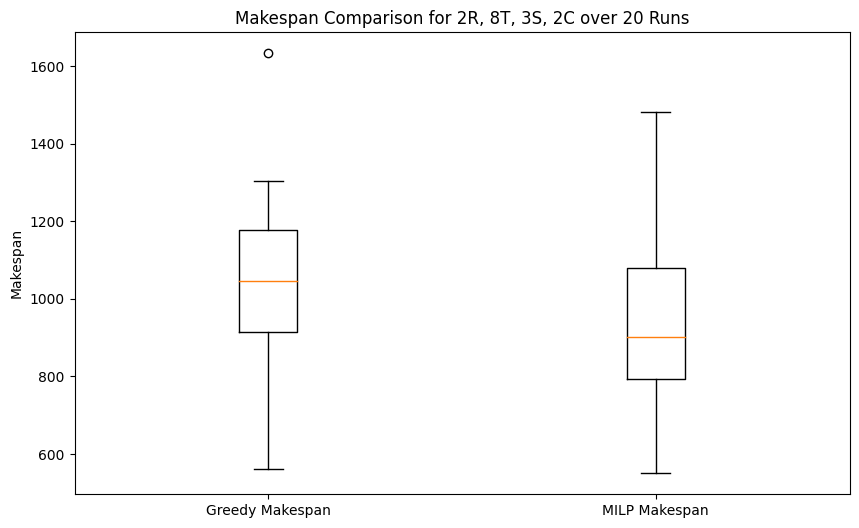

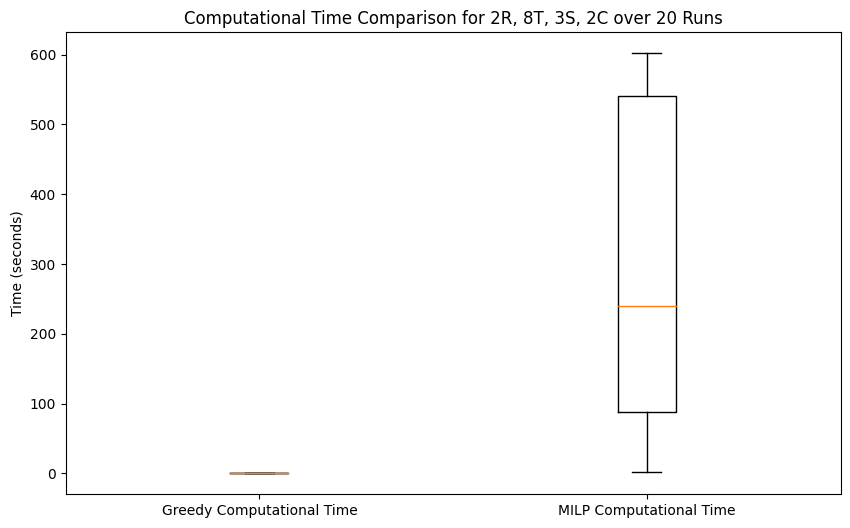

In [3]:

%autoreload
import time

greedy_makespan = []
milp_makespan = []
greedy_times = []
milp_times = []

n_tasks = 8
n_robots = 2
n_skills = 3  
n_iterations = 20
precedence_constraints = np.array([[1,2], [3,1]])

for iteration in tqdm(range(n_iterations)):
    problem_instance: ProblemData = generate_random_data(n_tasks, n_robots, n_skills, precedence_constraints)

    # Track time for the greedy algorithm
    start_time = time.time()
    makespan, robot_task_assignments, task_start_times = greedy_scheduling(problem_instance)
    greedy_makespan.append(makespan)
    greedy_times.append(time.time() - start_time)  

    # Track time for the MILP algorithm
    start_time = time.time()
    makespan, tasks_to_plot, task_colors = milp_scheduling(problem_instance)
    milp_makespan.append(makespan)
    milp_times.append(time.time() - start_time)  

# Boxplot for Makespan comparison
plt.figure(figsize=(10, 6))
plt.boxplot([greedy_makespan, milp_makespan], labels=['Greedy Makespan', 'MILP Makespan'])
plt.ylabel('Makespan')
plt.title(f'Makespan Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')
plt.show()

# Boxplot for Computational Time comparison
plt.figure(figsize=(10, 6))
plt.boxplot([greedy_times, milp_times], labels=['Greedy Computational Time', 'MILP Computational Time'])
plt.ylabel('Time (seconds)')
plt.title(f'Computational Time Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')
plt.show()

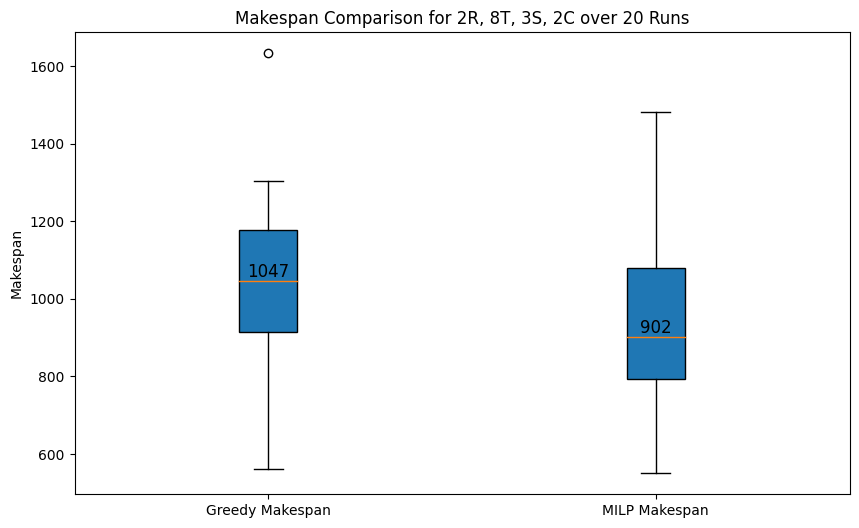

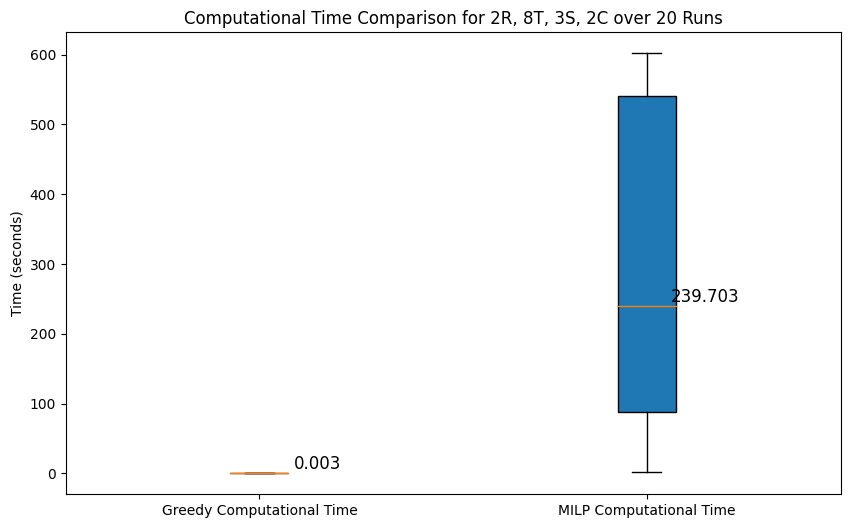

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Boxplot for Makespan comparison
plt.figure(figsize=(10, 6))
box_makespan = plt.boxplot([greedy_makespan, milp_makespan], labels=['Greedy Makespan', 'MILP Makespan'], patch_artist=True)
plt.ylabel('Makespan')
plt.title(f'Makespan Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')

# Annotate medians
for i, line in enumerate(box_makespan['medians']):
    median = np.median([greedy_makespan, milp_makespan][i])
    x, y = line.get_xdata().mean(), line.get_ydata().mean()
    plt.text(x, y, f'{median:.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

# Boxplot for Computational Time comparison
plt.figure(figsize=(10, 6))
box_times = plt.boxplot([greedy_times, milp_times], labels=['Greedy Computational Time', 'MILP Computational Time'], patch_artist=True)
plt.ylabel('Time (seconds)')
plt.title(f'Computational Time Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')

# Annotate medians
for i, line in enumerate(box_times['medians']):
    median = np.median([greedy_times, milp_times][i])
    x, y = line.get_xdata().mean() + 0.15 , line.get_ydata().mean()
    plt.text(x, y, f'{median:.3f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [60]:
%autoreload
instance = generate_simple_data()   
instance

{'Q': array([[1, 0],
        [0, 1]]),
 'R': array([[0., 0.],
        [1., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.]]),
 'T_e': array([ 0, 62, 58, 26, 14,  0]),
 'T_t': array([[ 0. , 22.8, 51. , 67.5, 17. , 57.4],
        [22.8,  0. , 73.2, 74.3, 16.6, 76.4],
        [51. , 73.2,  0. , 89.3, 60.9, 50.3],
        [67.5, 74.3, 89.3,  0. , 82. , 45.6],
        [17. , 16.6, 60.9, 82. ,  0. , 74.3],
        [57.4, 76.4, 50.3, 45.6, 74.3,  0. ]]),
 'task_locations': array([[51, 73],
        [73, 79],
        [ 0, 73],
        [59,  6],
        [59, 88],
        [18, 26]]),
 'precedence_constraints': array([], dtype=float64)}